# Jupyter Notebook and IPython
## Where Python meets the Web

### Based on:
<center>![Cookbook](images/cover-cookbook-2nd.png)</center>
http://ipython-books.github.io/

## First some cheap tricks

### Bash Support

In [1]:
!ls

README.md       csvmagic.py     environment.yml lecture.ipynb   workshop.ipynb
__pycache__     data            images          ruby.ipynb


### Line Magics

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%groovy  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python

### Built-in docs

In [3]:
%run?

## We can craft our own magics

In [4]:
from IPython.core.magic import (register_line_magic,
                                register_cell_magic)

In [5]:
@register_line_magic
def hello(line):
    if line == 'french':
        print("Salut tout le monde!")
    else:
        print("Hello world!")

In [6]:
%hello

Hello world!


In [7]:
%hello french

Salut tout le monde!


### Something a bit more useful

In [8]:
import pandas as pd
from io import StringIO

@register_cell_magic
def csv(line, cell):
    # We create a string buffer containing the
    # contents of the cell.
    sio = StringIO(cell)
    # We use Pandas' read_csv function to parse
    # the CSV string.
    return pd.read_csv(sio)

In [12]:
%%csv
col1,col2,col3
0,1,2
3,4,5
7,8,9

In [9]:
import beakerx

In [13]:
df = _
df.describe()

AttributeError: 'function' object has no attribute 'describe'

### We can also package magics

In [14]:
%%writefile csvmagic.py
import pandas as pd
from io import StringIO

def csv(line, cell):
    sio = StringIO(cell)
    return pd.read_csv(sio)

def load_ipython_extension(ipython):
    """This function is called when the extension is
    loaded. It accepts an IPython InteractiveShell
    instance. We can register the magic with the
    `register_magic_function` method of the shell
    instance."""
    ipython.register_magic_function(csv, 'cell')

Overwriting csvmagic.py


In [15]:
%load_ext csvmagic

In [16]:
%%csv
col1,col2,col3
0,1,2
3,4,5
7,8,9

## Wait, we're in a browser

In [17]:
from IPython.display import HTML
HTML('''
<table style="border: 2px solid black;">
''' +
     ''.join(['<tr>' +
              ''.join([f'<td>{row},{col}</td>'
                       for col in range(5)]) +
              '</tr>' for row in range(5)]) +
     '''
</table>
''')

"0,0","0,1","0,2","0,3","0,4"
"1,0","1,1","1,2","1,3","1,4"
"2,0","2,1","2,2","2,3","2,4"
"3,0","3,1","3,2","3,3","3,4"
"4,0","4,1","4,2","4,3","4,4"


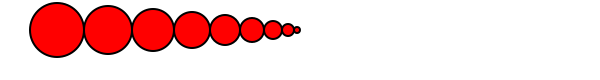

In [18]:
from IPython.display import SVG
SVG('''<svg width="600" height="80">''' +
    ''.join([f'''<circle
              cx="{(30 + 3*i) * (10 - i)}"
              cy="30"
              r="{3. * float(i)}"
              fill="red"
              stroke-width="2"
              stroke="black">
        </circle>''' for i in range(10)]) +
    '''</svg>''')

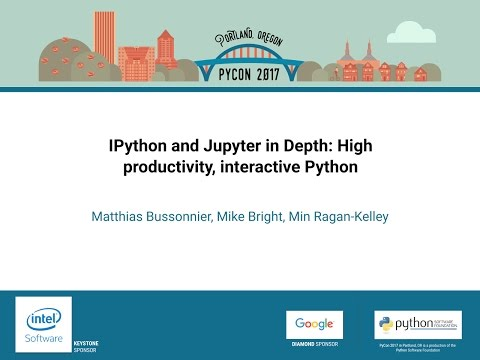

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('VQBZ2MqWBZI')

## And we have the best Data Analysis tools

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### So let's use them

In [21]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")
# url = 'data/comptagesvelo2015.csv'

In [22]:
df = pd.read_csv(url, index_col='Date',
                 parse_dates=True, dayfirst=True)

In [23]:
df.head(2)

In [24]:
df.describe()

### Simple plotting

In [26]:
import seaborn as sns; sns.set()

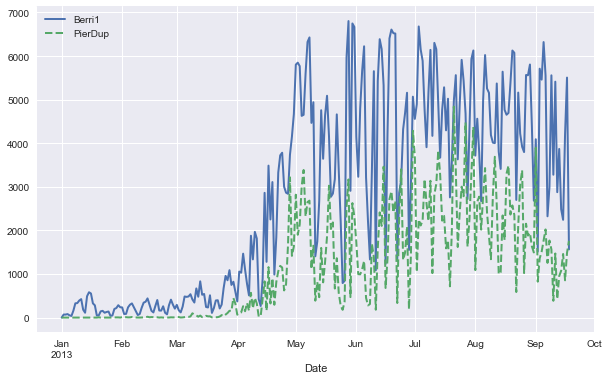

In [27]:
df[['Berri1', 'PierDup']].plot(figsize=(10, 6),
                               style=['-', '--'],
                               lw=2)

### Time-series analysis

In [28]:
df.index.weekday_name

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=261)

In [29]:
df_week = df.groupby(df.index.weekday).sum()

In [30]:
df_week

(0, 151791.7)

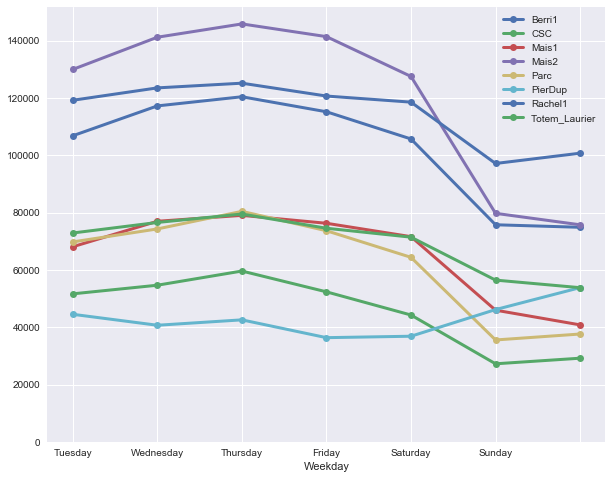

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday names.
ax.set_xticklabels(
    ('Monday,Tuesday,Wednesday,Thursday,'
     'Friday,Saturday,Sunday').split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

### Some human interaction

In [32]:
from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df['Berri1'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(0, 7000)
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-interact',))

## Re-using web frameworks

In [33]:
import numpy as np
import pandas as pd
import bokeh
import bokeh.plotting as bkh
bkh.output_notebook()

Loading BokehJS ...

In [34]:
f = bkh.figure(width=600, height=400)
f.circle(np.random.randn(1000),
         np.random.randn(1000), 
         size=np.random.uniform(2, 10, 1000),
         alpha=.5)
bkh.show(f)

In [35]:
from ipyleaflet import Map, Marker

pos = [32.08, 34.8]
m = Map(center=pos, zoom=17)
marker = Marker(location=pos,
                rise_on_hover=True,
                title="Here I am!",
                )
m += marker
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[32.08, 34.8], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), Marker(location=[32.08, 34.8], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], rise_on_hover=True, title='Here I am!')), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=17)

## More widgets, please

In [36]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [37]:
@widgets.interact
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-interact',))

In [38]:
@widgets.interact(x=(0, 5))
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=5), Output()), _dom_classes=('widget-interact',))

In [41]:
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
# @widgets.interact
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='color', options=('blue', 'red', 'green'), value='blue'), FloatSlider(value=2.0, description='lw', max=10.0, min=1.0), Checkbox(value=True, description='grid'), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

In [42]:
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Frequency:',
    readout_format='.1f',
)
freq_slider

FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0, readout_format='.1f')

In [43]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)
range_slider

FloatRangeSlider(value=(-1.0, 1.0), description='xlim:', max=5.0, min=-5.0, readout_format='.1f')

In [44]:
grid_button = widgets.ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)
grid_button

ToggleButton(value=False, description='Grid', icon='check')

In [45]:
color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green'), value='blue')

In [46]:
title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',
)
title_textbox

Text(value='Hello World', description='Title:')

In [47]:
color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
)
color_picker

ColorPicker(value='#efefef', concise=True, description='Background color:')

In [48]:
button = widgets.Button(
    description='Plot',
)
button

Button(description='Plot', style=ButtonStyle())

In [49]:
def plot2(b=None):
    xlim = range_slider.value
    freq = freq_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox.value
    bgcolor = color_picker.value

    t = np.linspace(xlim[0], xlim[1], 1000)
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.set_title(title)
    ax.set_facecolor(bgcolor)
    ax.plot(t, np.sin(2 * np.pi * freq * t), 
            color=color)
    ax.grid(grid)

In [50]:
@button.on_click
def plot_on_click(b):
    plot2()

## Let's bring it all together

In [51]:
tab1 = VBox(children=[freq_slider,
                      range_slider,
                      ])
tab2 = VBox(children=[color_buttons,
                      HBox(children=[title_textbox,
                                     color_picker,
                                     grid_button]),
                                     ])

VBox(children=(Tab(children=(VBox(children=(FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0, readout_format='.1f'), FloatRangeSlider(value=(-2.2, 1.4), description='xlim:', max=5.0, min=-5.0, readout_format='.1f'))), VBox(children=(ToggleButtons(description='Color:', options=('blue', 'red', 'green'), value='blue'), HBox(children=(Text(value='Hello World', description='Title:'), ColorPicker(value='#efefef', concise=True, description='Background color:'), ToggleButton(value=False, description='Grid', icon='check')))))), _titles={'0': 'plot', '1': 'styling'}), Button(description='Plot', style=ButtonStyle())))

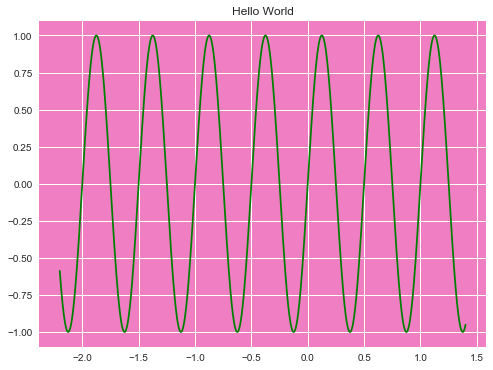

In [52]:
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'styling')
VBox(children=[tab, button])

### We can even define new widgets in-line

In [ ]:
import ipywidgets as widgets
from traitlets import Unicode, Int, validate

In [ ]:
class CounterWidget(widgets.DOMWidget):
    _view_name = Unicode('CounterView').tag(sync=True)
    _view_module = Unicode('counter').tag(sync=True)
    value = Int(0).tag(sync=True)

In [ ]:
%%javascript
// We make sure the `counter` module is defined
// only once.
require.undef('counter');

// We define the `counter` module depending on the
// Jupyter widgets framework.
define('counter', ["@jupyter-widgets/base"],
       function(widgets) {

    // We create the CounterView frontend class,
    // deriving from DOMWidgetView.
    var CounterView = widgets.DOMWidgetView.extend({

        // This method creates the HTML widget.
        render: function() {
            // The value_changed() method should be
            // called when the model's value changes
            // on the kernel side.
            this.value_changed();
            this.model.on('change:value',
                          this.value_changed, this);

            var model = this.model;
            var that = this;

            // We create the plus and minus buttons.
            this.bm = $('<button/>')
            .text('-')
            .click(function() {
                // When the button is clicked,
                // the model's value is updated.
                var x = model.get('value');
                model.set('value', x - 1);
                that.touch();
            });

            this.bp = $('<button/>')
            .text('+')
            .click(function() {
                var x = model.get('value');
                model.set('value', x + 1);
                that.touch();
            });

            // This element displays the current
            // value of the counter.
            this.span = $('<span />')
            .text('0')
            .css({marginLeft: '10px',
                  marginRight: '10px'});

            // this.el represents the widget's DOM
            // element. We add the minus button,
            // the span element, and the plus button.
            $(this.el)
            .append(this.bm)
            .append(this.span)
            .append(this.bp);
        },

        value_changed: function() {
            // Update the displayed number when the
            // counter's value changes.
            var x = this.model.get('value');
            $($(this.el).children()[1]).text(x);
        },
    });

    return {
        CounterView : CounterView
    };
});

In [ ]:
w = CounterWidget()
w

In [ ]:
print(w.value)